# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree            import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

In [109]:
X_train = pd.read_csv('X_treino.csv')
y_train = pd.read_csv(r".\input\train\y_train.txt")

X_test = pd.read_csv('X_teste.csv')
y_test = pd.read_csv(r'.\input\test\y_test.txt')

In [111]:
y_train.shape

(7351, 1)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [112]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1993)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [122]:
dtree = DecisionTreeRegressor(max_depth=4, random_state=1993)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=1993)

In [123]:
dtree.feature_importances_

array([0.73874892, 0.21194932, 0.04930176])

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [124]:
%%time
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_collection, impurities = path.ccp_alphas, path.impurities

CPU times: total: 0 ns
Wall time: 10.2 ms


In [126]:
clfs = []
for ccp_alpha in ccp_alphas_collection:
    clf = DecisionTreeRegressor(random_state=1993, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

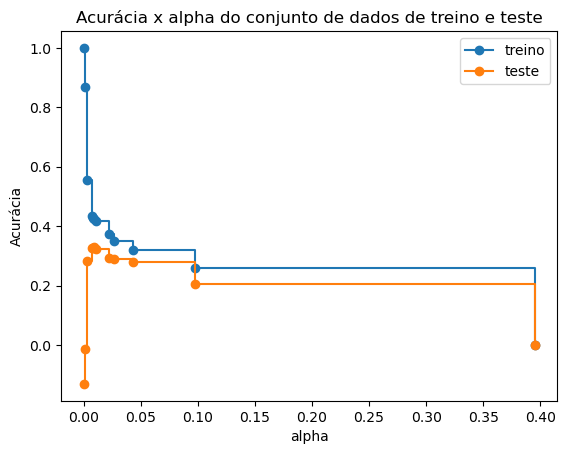

CPU times: total: 344 ms
Wall time: 417 ms


In [127]:
%%time
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas_collection, train_scores, marker='o', label="treino", drawstyle="steps-post")
ax.plot(ccp_alphas_collection, test_scores, marker='o', label="teste", drawstyle="steps-post")
ax.legend()
plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [128]:
#pegar a arvore com melhor cpp_alpha
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeRegressor(ccp_alpha=0.00880074301213915, random_state=1993)

In [129]:
print(f'Acuracia base treino: {melhor_arvore.score(X_train, y_train)}')
print(f'Acuracia base teste: {melhor_arvore.score(X_test, y_test)}')
print(f'Acuracia base de validação: {melhor_arvore.score(X_valid, y_valid)}')

Acuracia base treino: 0.423746842095584
Acuracia base teste: 0.3549721145168119
Acuracia base de validação: 0.3283074669648205
